ValueError: zero-size array to reduction operation maximum which has no identity

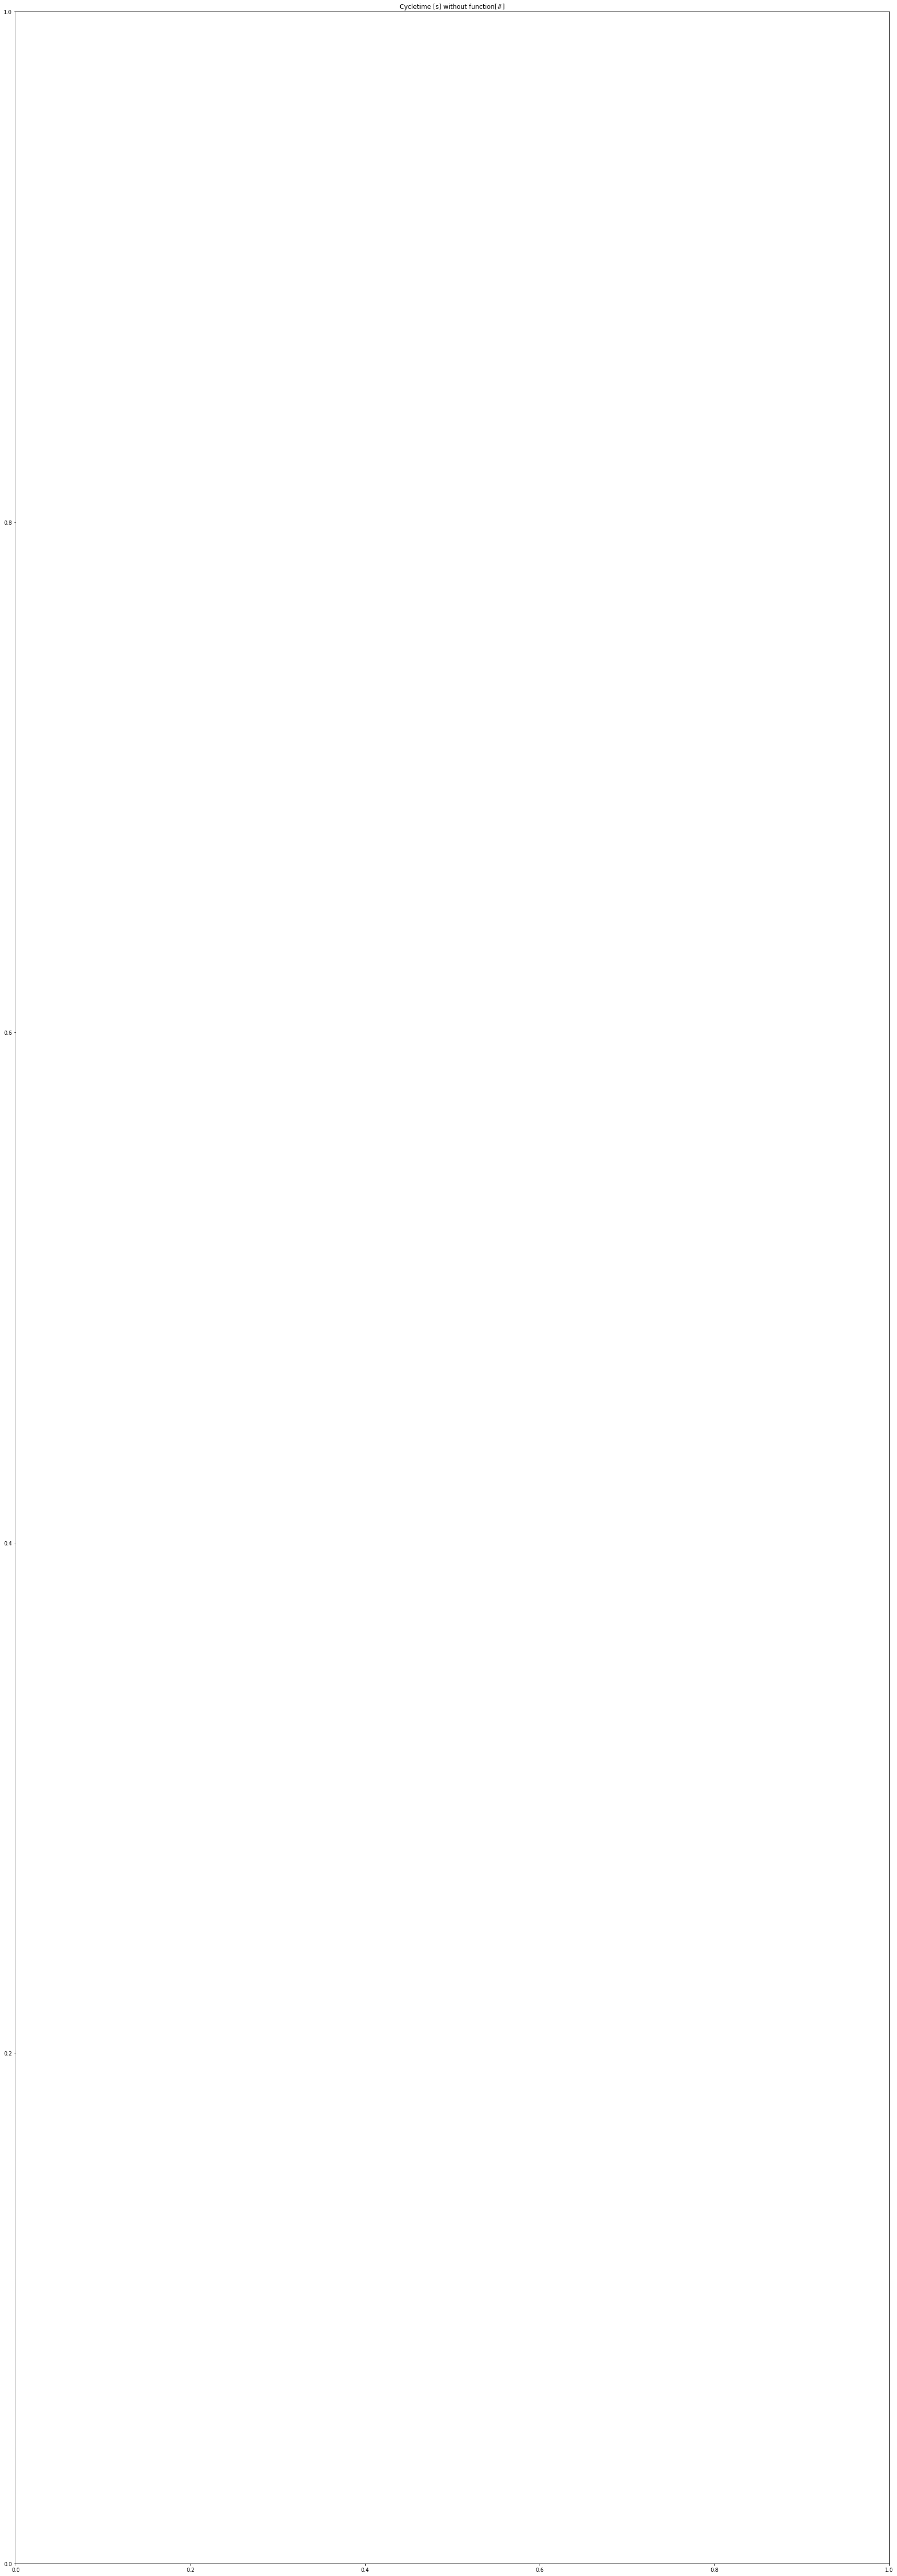

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.ticker import (MultipleLocator)
import csv
import pathlib

file = "secondary_calls.csv"
responseSize = 3
data = []
func = False
with open(file) as plotValues:
    spamreader = csv.reader(plotValues, delimiter='\t', quotechar='|')
    stat = {}
    for row in spamreader:
        try:
            if row[1] == '':
                function = row[0][8:]
                stat = {}
                stat['label'] = row[0]
                func = True

            if row[0] == '':
                func = False
            if func == True:
                if row[0] == 'outlierMax':
                    pass
                 #   stat['outlierMax'] = row[1]

                if row[0] == 'max':
                    stat['whishi'] = float(row[1])

                if row[0] == 'q75':
                    stat['q3'] = float(row[1])

                if row[0] == 'median':
                    stat['med'] = float(row[1])

                if row[0] == 'q25':
                    stat['q1'] = float(row[1])

                if row[0] == 'min':
                    stat['whislo'] = float(row[1])

                if row[0] == 'outlierMin':
                    pass
                #    stat['outlierMin'] = row[1]

                if row[0] == 'skewness':
                    #    stat['skewness'] = row[1]
                    data.append(stat)
                else:
                    pass
        except IndexError:
            None

#
outlierMax = 15.625
max = 10.99152
q75 = 10.331111
median = 10.1226935
q25 = 9.968218
min = 9.54068
outlierMin = 0.0
skewness = 0.148644366245696

stats = [{
    "label": '1',  # not required
    "med": median,
    "q1": q25,
    "q3": q75,
    # "cilo": 5.3 # not required
    # "cihi": 5.7 # not required
    "whislo": min,  # required
    "whishi": max,  # required
    "fliers": [outlierMax, outlierMin]  # required if showfliers=True
}]

fig1, ax1 = plt.subplots(sharey=True, sharex=True, figsize=(30, 90))
ax1.set_title('Cycletime [s] without function[#]')
# ax1.boxplot(data)
ax1.bxp(data, showfliers=False, vert=False, meanline=True)
ax1.xaxis.set_major_locator(MultipleLocator(1))
plt.tight_layout()
plt.grid(True, which='both', axis='x', linewidth=2, linestyle='--')
plt.show()


Baseline 1 = 11.380998000000002
-2.46


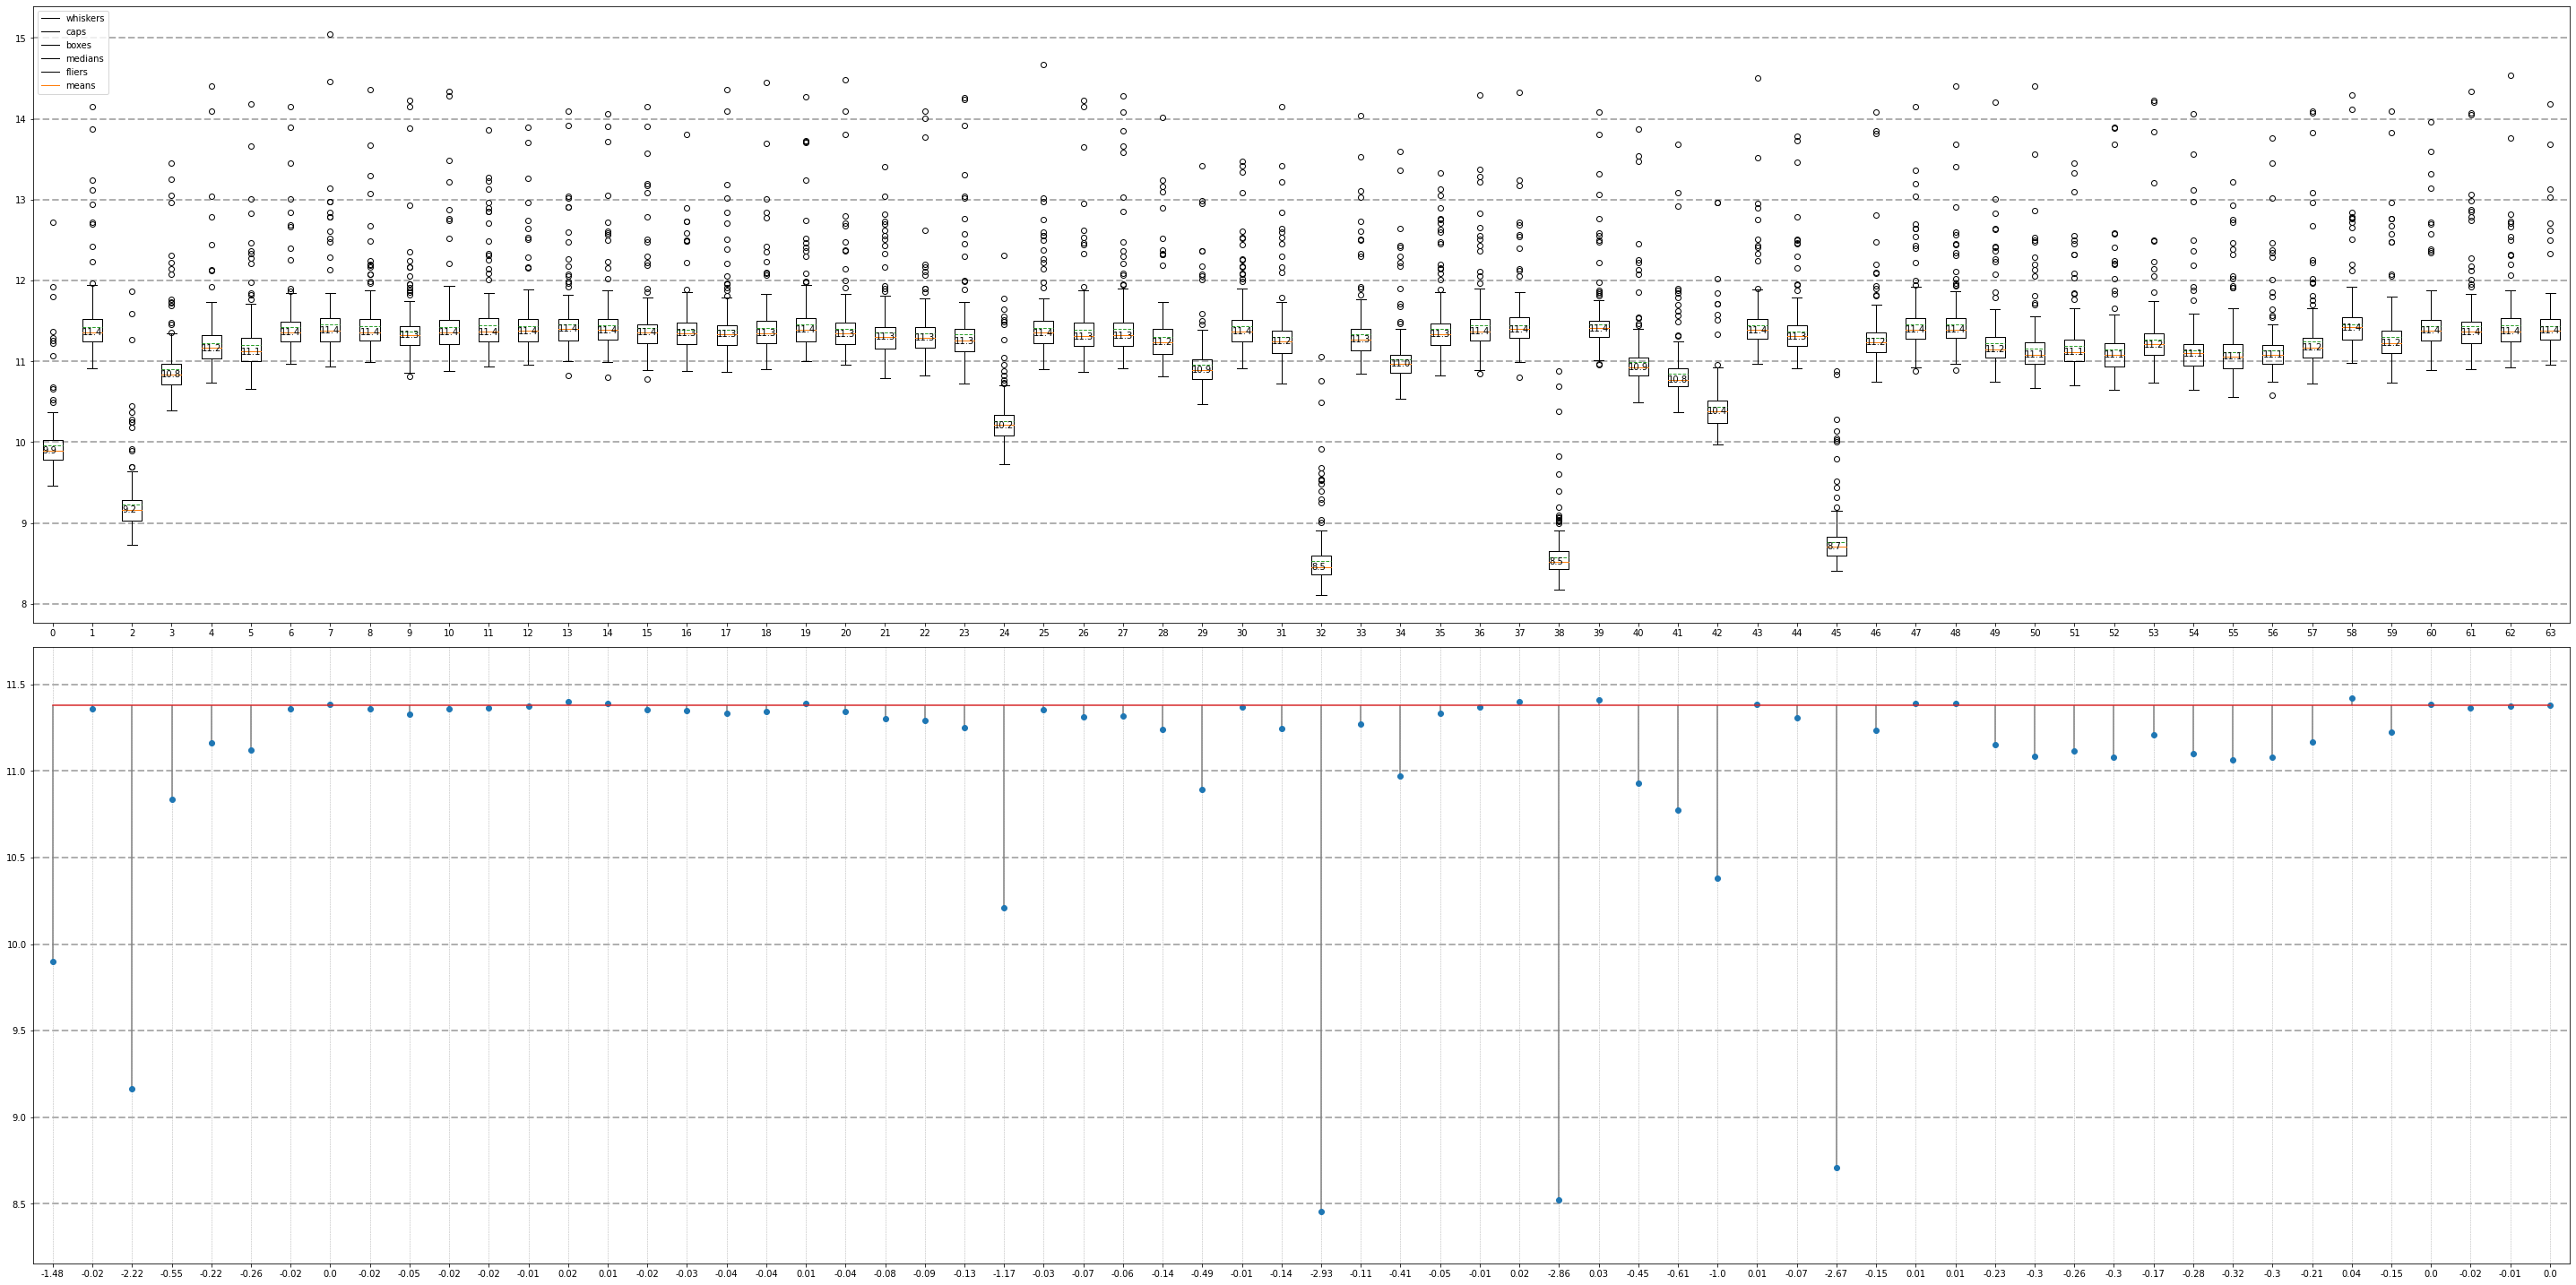

Baseline 2 = 11.3959175


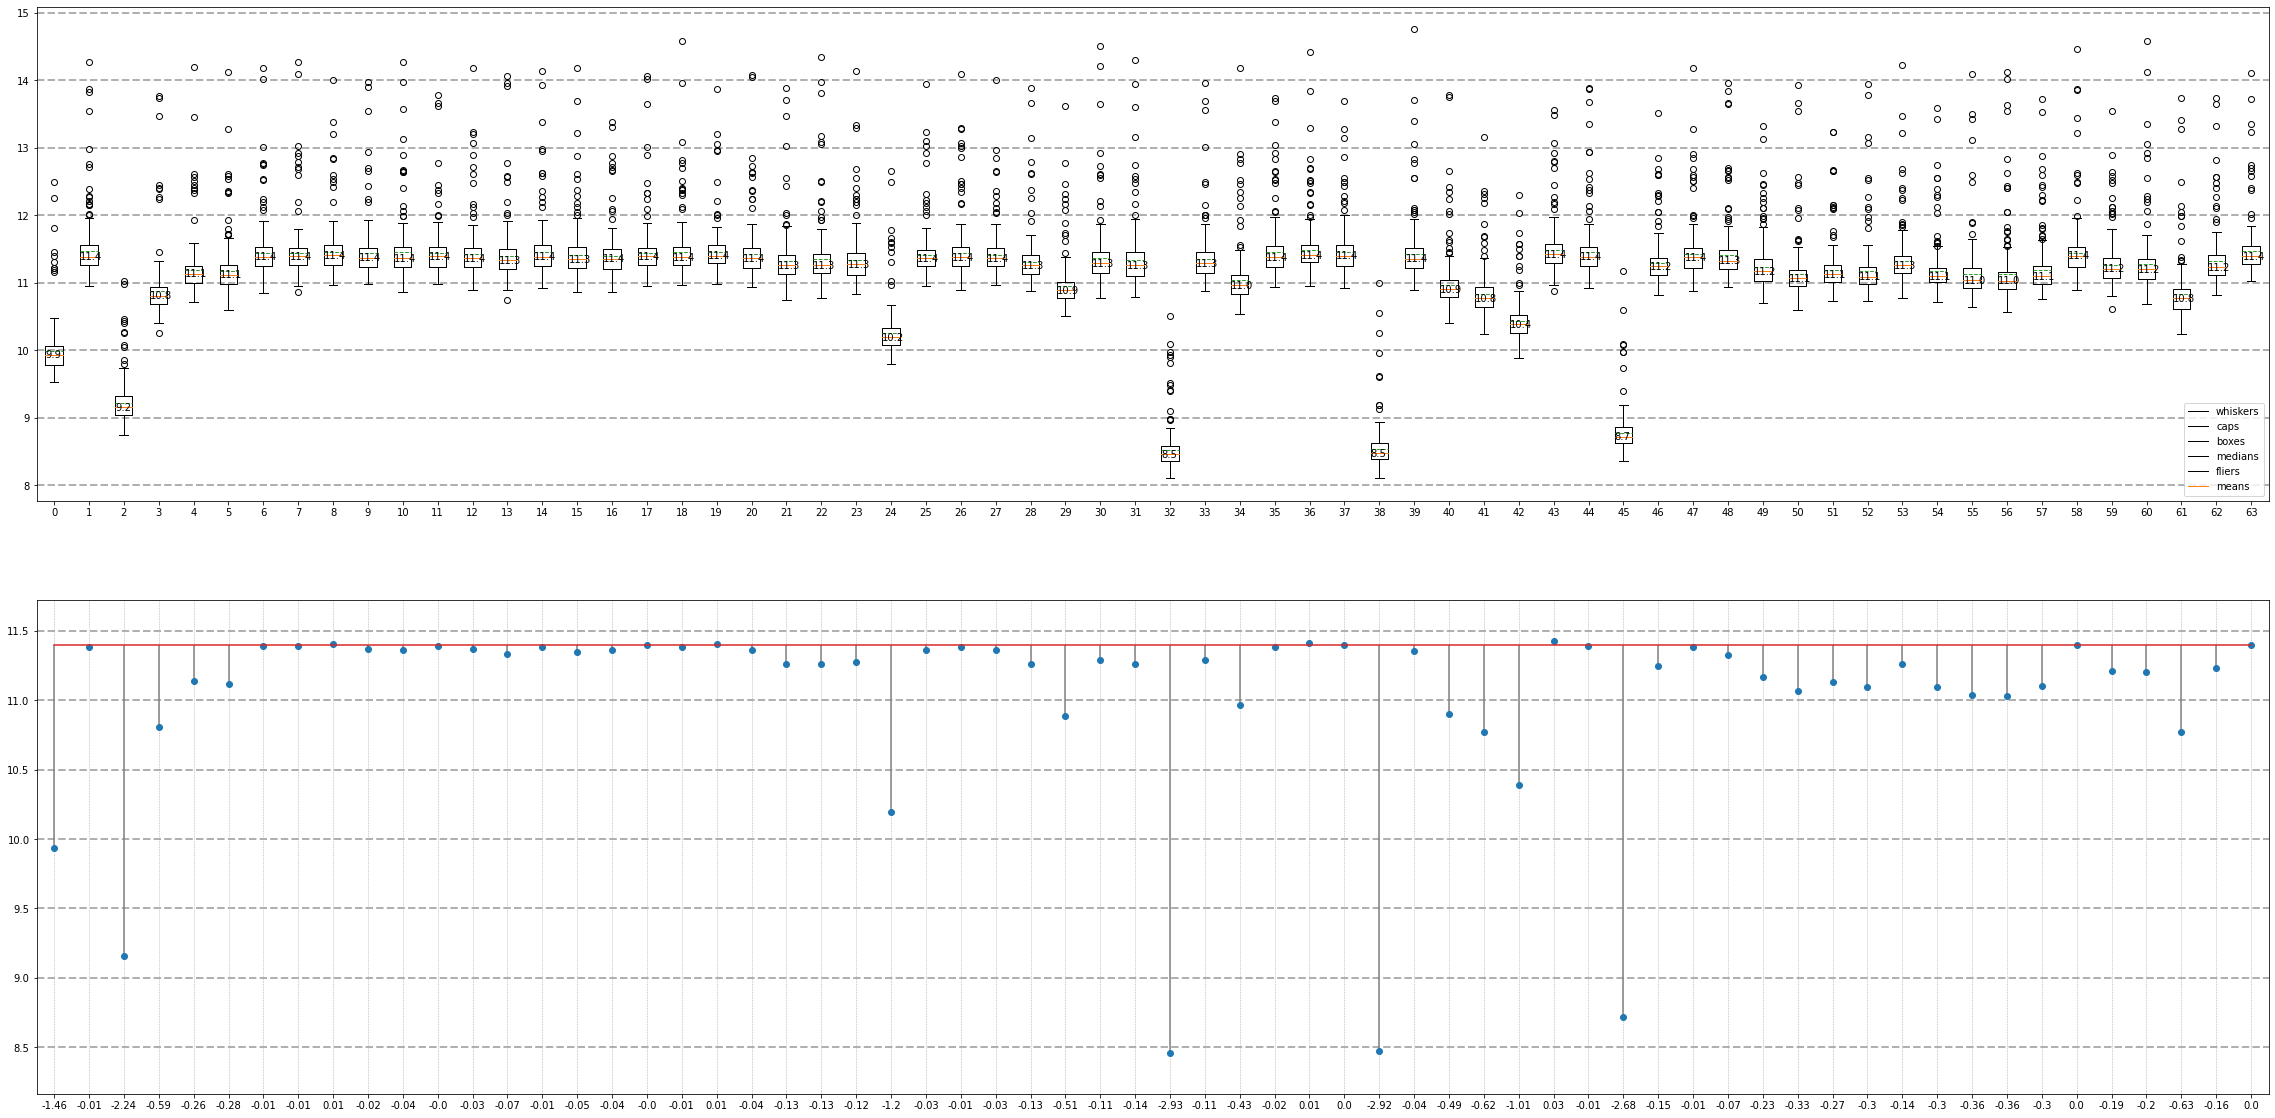

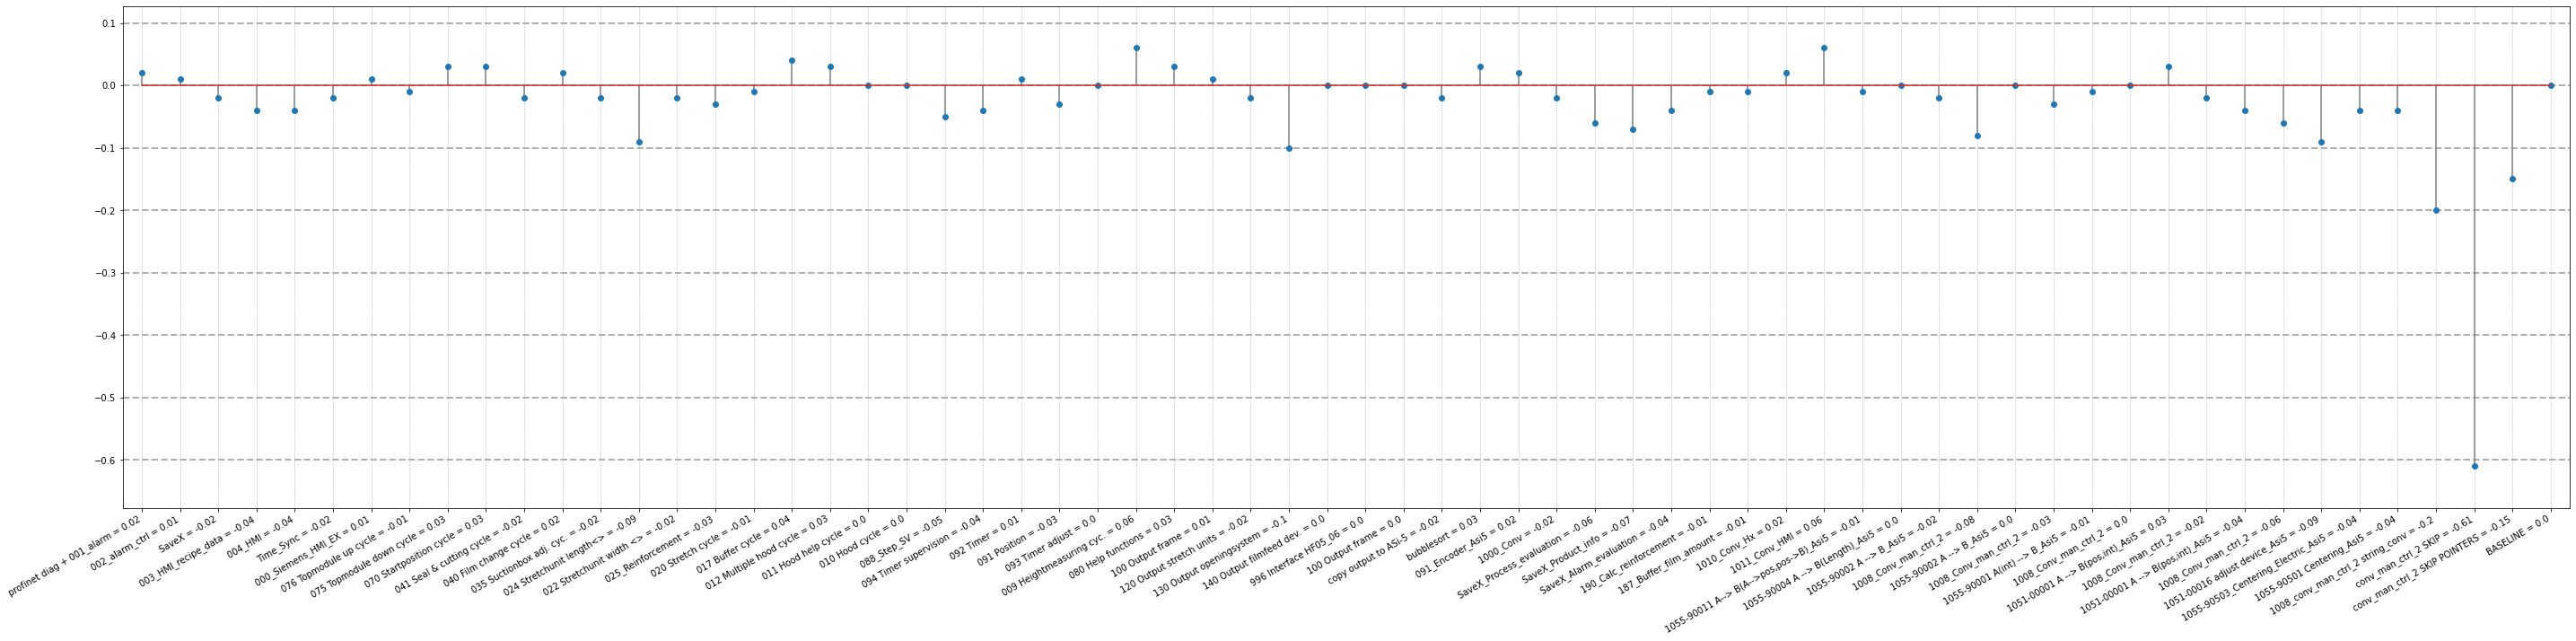

-2.82


In [270]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.ticker import (MultipleLocator)
import csv
import pathlib

file = "secondary_calls.csv"
responseSize = 3
data = []
func = False
with open(file) as plotValues:
    func_list = []
    spamreader = csv.reader(plotValues, delimiter='\t', quotechar='|')
    stat = {}

    for row in spamreader:
        try:
            if row[0][:8] == 'function':
                label = row[0][9:]
                label = label[:-1]
                func = True
            if row[0] == '':
                func = False
            if func == True:
                if row[1] != '':
                    func_list.append(float(row[1]))
                if row[0] == "time[255]":
                    stat[label] = func_list
                    func_list = []
        except IndexError:
            None
    data.append(stat)
# Plot tables
fig1, ax1 = plt.subplots(sharey=True, sharex=True, figsize=(40, 20))
ax1.axis('tight')
plt.subplot(2, 1, 1)
labels, data = [*zip(*data[0].items())]
bp = plt.boxplot(data, meanline=True, showmeans=True, bootstrap=5000)

line_y = []
for line in bp['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1]  # top of median line
    # overlay median value
    plt.text(x-0.5, y, '%.1f' % y, verticalalignment='center')
    line_y.append(y)

res = {key: [v.get_data() for v in value] for key, value in bp.items()}
plt.xticks(range(1, len(labels) + 1), labels)
plt.grid(True, which='both', axis='y', linewidth=2, linestyle='--')
plt.legend(res)

plt.subplot(2, 1, 2)
ax1.set_xlim(0)
markerline, stemlines, baseline = plt.stem(
    line_y, bottom=line_y[63], linefmt='grey')
print(f'Baseline 1 = {line_y[63]}')
difference = []
for val in line_y:
    diff = val - line_y[63]
    diff = '%.2f' % diff
    difference.append(float(diff))
plt.xticks(range(0, len(labels)), difference)
plt.grid(True, which='both', axis='x', linewidth=0.5, linestyle='--')
plt.grid(True, which='both', axis='y', linewidth=2, linestyle='--')

plt.tight_layout(pad=1, w_pad=1.0, h_pad=1)
plt.margins(x=0.008, y=0.1)
print(f'{sum(difference[46:59])}')
plt.show()


file = "third_calls.csv"
responseSize = 3
data = []
func = False
func_description = ['profinet diag + 001_alarm', '002_alarm_ctrl', 'SaveX', "003_HMI_recipe_data", "004_HMI", "Time_Sync", "000_Siemens_HMI_EX", "076 Topmodule up cycle", "075 Topmodule down cycle", "070 Startposition cycle", "041 Seal & cutting cycle", "040 Film change cycle", "035 Suctionbox adj. cyc.", "024 Stretchunit length<>", "022 Stretchunit width <>", "025_Reinforcement", "020 Stretch cycle", "017 Buffer cycle", "012 Multiple hood cycle", "011 Hood help cycle", "010 Hood cycle", "088_Step_SV", "094 Timer supervision", "092 Timer", "091 Position", "093 Timer adjust", "009 Heightmeasuring cyc.", "080 Help functions", "100 Output frame",
                    "120 Output stretch units", "130 Output openingsystem", "140 Output filmfeed dev.", "996 Interface HF05_06", "100 Output frame", "copy output to ASi-5", 'bubblesort', "091_Encoder_Asi5", "1000_Conv", "SaveX_Process_evaluation", "SaveX_Product_info", "SaveX_Alarm_evaluation", "190_Calc_reinforcement", "187_Buffer_film_amount", "1010_Conv_Hx", "1011_Conv_HMI", "1055-90011 A--> B(A-->pos,pos->B)_Asi5", "1055-90004 A --> B(Length)_Asi5", "1055-90002 A --> B_Asi5", "1008_Conv_man_ctrl_2", "1055-90002 A --> B_Asi5", "1008_Conv_man_ctrl_2", "1055-90001 A(int) --> B_Asi5", "1008_Conv_man_ctrl_2", "1051-00001 A --> B(pos,int)_Asi5", "1008_Conv_man_ctrl_2", "1051-00001 A --> B(pos,int)_Asi5", "1008_Conv_man_ctrl_2", "1051-00016 adjust device_Asi5", "1055-90503_Centering_Electric_Asi5", "1055-90501 Centering_Asi5", '1008_conv_man_ctrl_2 string_conv', 'conv_man_ctrl_2 SKIP', 'conv_man_ctrl_2 SKIP POINTERS','BASELINE']

with open(file) as plotValues:
    func_list = []
    spamreader = csv.reader(plotValues, delimiter='\t', quotechar='|')
    stat = {}

    for row in spamreader:
        try:
            if row[0][:8] == 'function':
                label = row[0][9:]
                label = label[:-1]
                func = True
            if row[0] == '':
                func = False
            if func == True:
                if row[1] != '':
                    func_list.append(float(row[1]))
                if row[0] == "time[255]":
                    stat[label] = func_list
                    func_list = []
        except IndexError:
            None
    data.append(stat)
# Plot tables
fig1, ax1 = plt.subplots(sharey=True, sharex=True, figsize=(40, 20))
ax1.axis('tight')
plt.subplot(2, 1, 1)
labels, data = [*zip(*data[0].items())]
bp = plt.boxplot(data, meanline=True, showmeans=True, bootstrap=5000)

line_y = []
for line in bp['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1]  # top of median line
    # overlay median value
    plt.text(x-0.5, y, '%.1f' % y, verticalalignment='center')
    line_y.append(y)


res = {key: [v.get_data() for v in value] for key, value in bp.items()}
plt.xticks(range(1, len(labels) + 1), labels)
plt.grid(True, which='both', axis='y', linewidth=2, linestyle='--')
plt.legend(res)

plt.subplot(2, 1, 2)
ax1.set_xlim(0)
markerline, stemlines, baseline = plt.stem(
    line_y, bottom=line_y[63], linefmt='grey')
print(f'Baseline 2 = {line_y[63]}')
difference_b = []
for val in line_y:
    diff = val - line_y[63]
    diff = '%.2f' % diff
    difference_b.append(float(diff))
plt.xticks(range(0, len(labels)), difference_b)
plt.grid(True, which='both', axis='x', linewidth=0.5, linestyle='--')
plt.grid(True, which='both', axis='y', linewidth=2, linestyle='--')
plt.margins(x=0.008, y=0.1)
plt.show()


fig1, ax1 = plt.subplots(sharey=True, sharex=True, figsize=(40, 10))
plt.subplot(1, 1, 1)
difference_sum = []
for val in range(len(difference)):
    float_val = difference_b[val] - difference[val]
    float_val = '%.2f' % float_val
    difference_sum.append(float(float_val))

labels_with_comment = []
for i in range(len(difference_sum)):
    labels_with_comment.append(func_description[i] + ' = ' + str(difference_sum[i]))
labels_with_comment = tuple(labels_with_comment)

plt.stem(difference_sum, bottom=difference_sum[63], linefmt='grey')
plt.xticks(range(0, len(labels)), labels_with_comment, rotation=45)
fig1.autofmt_xdate()
plt.grid(True, which='both', axis='x', linewidth=0.5, linestyle='--')
plt.grid(True, which='both', axis='y', linewidth=2, linestyle='--')

plt.margins(x=0.008, y=0.1)
plt.tight_layout(pad=1, w_pad=1.0, h_pad=2)
plt.show()
print(f'{sum(difference_b[46:59])}')


In [222]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.ticker import (MultipleLocator)
import csv
import pathlib

before_csv = "secondary_calls.csv"
after_csv = "third_calls.csv"
responseSize = 3
data = []
func = False
with open(before_csv) as plotValues:
    func_list = []
    spamreader = csv.reader(plotValues, delimiter='\t', quotechar='|')
    stat = {}

    for row in spamreader:
        try:
            if row[0][:8] == 'function':
                label = row[0][9:]
                label = label[:-1]
                func = True
            if row[0] == '':
                func = False
            if func == True:
                if row[1] != '':
                    func_list.append(float(row[1]))
                if row[0] == "time[255]":
                    stat[label] = func_list
                    func_list = []
        except IndexError:
            None
    data.append(stat)

with open(after_csv) as plotValues:
    func_list = []
    spamreader = csv.reader(plotValues, delimiter='\t', quotechar='|')
    stat = {}

    for row in spamreader:
        try:
            if row[0][:8] == 'function':
                label = row[0][9:]
                label = label[:-1]
                func = True
            if row[0] == '':
                func = False
            if func == True:
                if row[1] != '':
                    func_list.append(float(row[1]))
                if row[0] == "time[255]":
                    stat[label] = func_list
                    func_list = []
        except IndexError:
            None
    data.append(stat)

dict_a = data[0]
dict_b = data[1]
for key, val in dict_a.items():
    print(dict_b.get(key))
    value = val - dict_b.get(key)
    print(value)




[10.557298, 11.012947, 9.180067, 9.475408, 9.131707, 9.370107, 9.650893, 9.653236, 9.404493, 9.509169, 9.224107, 10.377404, 9.310267, 9.716564, 9.33052, 9.379778, 9.710911, 9.428027, 9.777284, 9.560938, 9.423649, 9.306778, 9.758217, 9.359498, 9.540187, 9.176502, 9.272836, 9.712666, 9.512885, 9.228329, 9.470128, 9.071965, 9.40288, 9.265413, 9.488334, 9.493222, 9.489555, 9.481285, 9.651151, 9.463693, 9.399894, 9.614902, 9.362729, 9.463426, 9.440329, 9.360227, 9.399115, 9.124765, 9.71692, 9.596275, 9.459072, 9.438306, 9.419782, 9.756583, 9.554471, 9.310138, 9.490328, 9.451067, 9.624978, 11.882742, 10.494565, 9.344706, 9.237449, 9.3278, 9.598085, 9.419075, 9.570573, 9.51824, 9.489614, 9.678151, 9.442951, 9.758036, 9.359791, 9.323266, 9.508569, 9.173796, 9.2468, 9.457938, 9.186035, 9.626031, 9.240018, 9.834876, 9.429533, 9.593213, 9.179316, 9.633404, 9.1692, 9.312774, 9.415488, 9.448938, 11.22504, 9.495649, 9.351298, 9.45712, 9.23044, 9.49332, 9.488084, 9.360694, 9.312511, 9.476858, 9.22350

TypeError: unsupported operand type(s) for -: 'list' and 'list'